# Лабораторная работа по теме: "Работа с молекулами"

Данная лабораторная работа включает работу с библиотеками RDkit и CGRtools.

In [1]:
import os

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from rdkit.Chem import Draw

# ================================================================

from CGRtools.files import SMILESRead, SDFRead, SDFWrite, RDFRead, RDFWrite, INCHIRead
from CGRtools.utils import from_rdkit_molecule, to_rdkit_molecule
from CGRtools import smiles, inchi
from io import StringIO, BytesIO

-------------------------------

## RDkit

RDkit представляет собой библиотеку с открытым исходным кодом для хемоинформатики . Данная библиотека имеет API для использования в таких языках программирования, как Python (2.x и 3.x), Java и C#. Кроме того, в ее состав входит набор хемоинформатических узлов для KNIME и картридж молекулярной базы данных для PostgreSQL.

Основная информация о **RDkit** (установка, основные возможности) доступна по ссылке: http://www.rdkit.org/RDKit_Docs.current.pdf

### Чтение и запись молекул

В результате чтения файлов с помощью **RDKit**  мы получаем объекты класса `rdkit.Chem.rdchem.Mol`.

В **RDKit** большая часть базовой функциональности, связанной с работой с молекулами, находится в модуле `rdkit.Chem`.

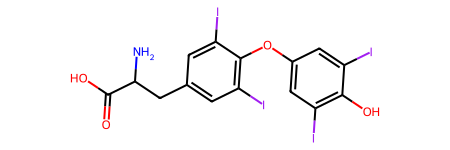

In [2]:
# Тироксин (прогормон к трийодтиронину)
thyroxine_rdkit = Chem.MolFromSmiles('C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=O)O)N')  # RDKit
thyroxine_rdkit

In [3]:
m = Chem.MolFromSmiles('c1cc1') # ошибка
m is None 

[15:42:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2


True

##### Чтение набора молекул, представленных в виде SMILES, из текстового файла:

In [4]:
# RDKit
mols_txt_rdkit = [x for x in Chem.SmilesMolSupplier('data/molecules.txt', titleLine=False)]
mols_txt_rdkit

[15:42:52] WARNING: no name column found on line 0
[15:42:52] WARNING: no name column found on line 1
[15:42:52] WARNING: no name column found on line 2
[15:42:52] WARNING: no name column found on line 3
[15:42:52] WARNING: no name column found on line 4
[15:42:52] WARNING: no name column found on line 5


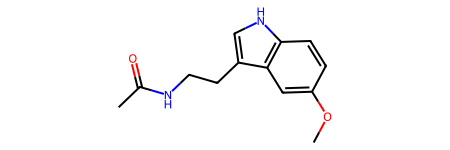

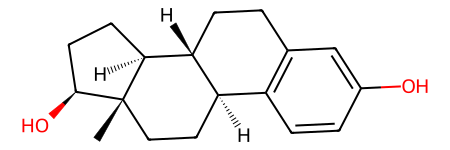

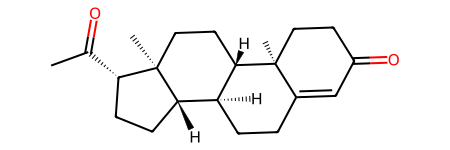

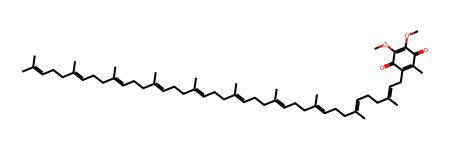

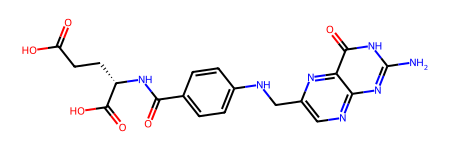

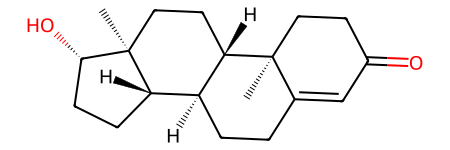

In [5]:
# Мелатонин
# Эстрадиол (из семейства эстрогенов)
# Прогестерон
# Убихинон
# Фолиевая кислота
# Тестостерон
for mol in range(len(mols_txt_rdkit)):
    display(mols_txt_rdkit[mol])

##### Чтение одной молекулы из MOL файла:

In [6]:
folder_path = "data"
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".mol"):
            print(file)

succinic_acid.mol
retinol.mol
citric_acid.mol
thiamine.mol
alpha_tocopherol.mol
bisphosphate_inositol.mol
tryptophan.mol
magnesium_glycinate.mol


'succinic_acid.mol'

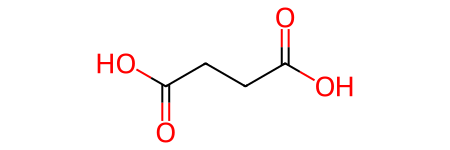

'retinol.mol'

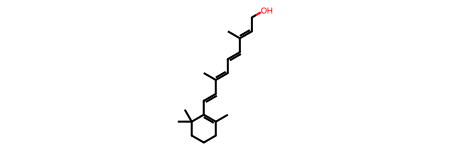

'citric_acid.mol'

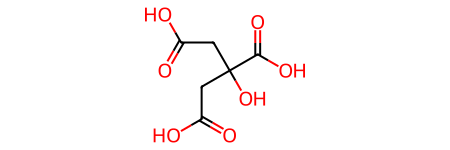

'thiamine.mol'

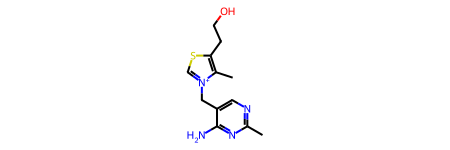

'alpha_tocopherol.mol'

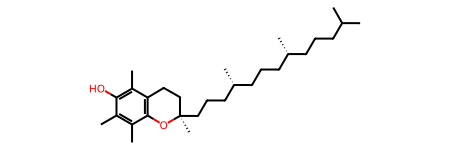

'bisphosphate_inositol.mol'

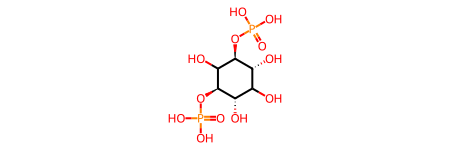

'tryptophan.mol'

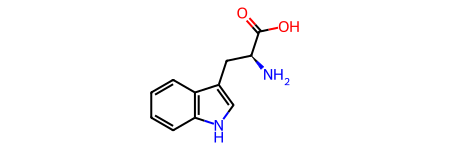

'magnesium_glycinate.mol'

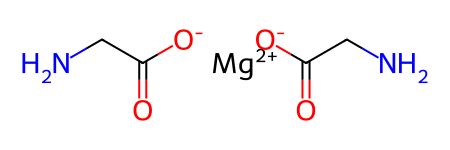

In [7]:
# RDKit
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".mol"):
            file_path = os.path.join(root, file)
            try:
                display(file)
                molecule = Chem.MolFromMolFile(file_path)
                display(molecule)
            except Exception as e:
                print(f"Error: ({file}): {e}")

##### Чтение одной молекулы из InChI:

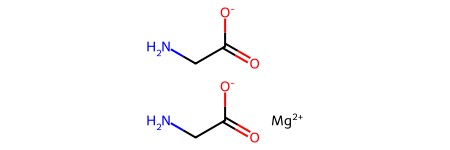

In [8]:
# RDKit
mol_inchi_rdkit = Chem.MolFromInchi('InChI=1S/2C2H5NO2.Mg/c2*3-1-2(4)5;/h2*1,3H2,(H,4,5);/q;;+2/p-2')
mol_inchi_rdkit

##### Чтение набора молекул из SDF:

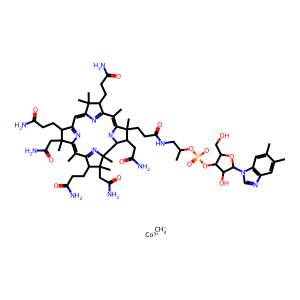

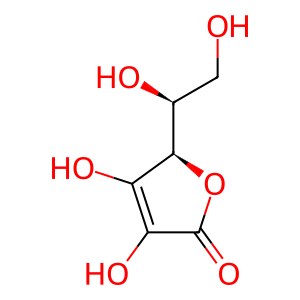

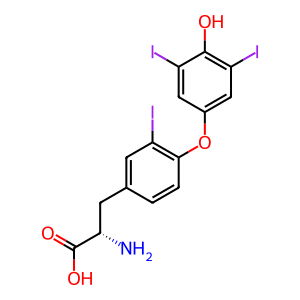

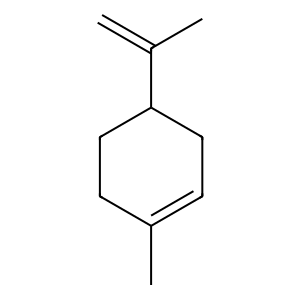

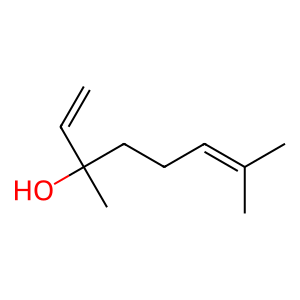

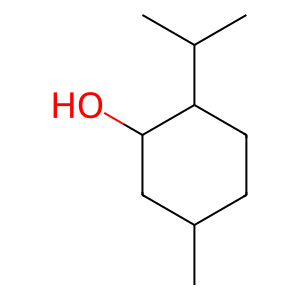

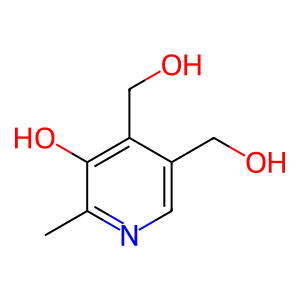

In [9]:
# В sdf файле содержится также доп информация, нарисуем только молекулы
# создаем лист объектов
list_molecules_rdkit = list(Chem.SDMolSupplier('data/set_molecules.sdf'))


for mol in list_molecules_rdkit:
    if mol:
        display(Draw.MolToImage(mol))

In [10]:
# RDKit
for m in Chem.SDMolSupplier('data/set_molecules.sdf'):
    if m is None: 
        continue
    print(m.GetProp("PUBCHEM_IUPAC_OPENEYE_NAME"))
    print("число неводородных атомов в молекуле: ", m.GetNumAtoms()) # показывает число атомов в молекуле
    print("----------------------------------------------------------------------------------")

cobaltic;carbanide;[5-(5,6-dimethylbenzimidazol-1-yl)-4-hydroxy-2-(hydroxymethyl)tetrahydrofuran-3-yl] [1-methyl-2-[3-[(4Z,9Z,14Z)-2,13,18-tris(2-amino-2-oxo-ethyl)-7,12,17-tris(3-amino-3-oxo-propyl)-3,5,8,8,13,15,18,19-octamethyl-2,7,12,17-tetrahydro-1H-corrin-21-id-3-yl]propanoylamino]ethyl] phosphate
число неводородных атомов в молекуле:  92
----------------------------------------------------------------------------------
(2R)-2-[(1S)-1,2-dihydroxyethyl]-3,4-dihydroxy-2H-furan-5-one
число неводородных атомов в молекуле:  12
----------------------------------------------------------------------------------
(2S)-2-amino-3-[4-(4-hydroxy-3,5-diiodo-phenoxy)-3-iodo-phenyl]propanoic acid
число неводородных атомов в молекуле:  23
----------------------------------------------------------------------------------
4-isopropenyl-1-methyl-cyclohexene
число неводородных атомов в молекуле:  10
----------------------------------------------------------------------------------
3,7-dimethylocta-1,6

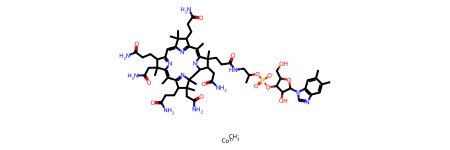

In [11]:
Chem.SDMolSupplier('data/set_molecules.sdf')[0] # произвольный доступ к данным. срезы не работают.

**RDKit** для молекул с ошибками возвращает `None`, в то время как **CGRtools** просто пропускает запись. Поэтому необходимо следить, чтобы данные были прочитаны верно.

### Запись нескольких молекул в SDF

Прочитаем молекулы в SMILES формате; рассчитаем координаты; запишем в SDF. SDF является наиболее удобным для хранения структурной информации форматом файлов. В отличие от SMILES, в нем хранятся координаты атомов в пространстве, что для сложных молекул позволяет вручную паодобрать наиболее читаемую картинку. Помимо этого, не приходится каждый раз рассчитывать координаты, что вычислительно затратно.

In [12]:
# RDKit
ms = []
for m in Chem.SmilesMolSupplier('data/molecules.txt',titleLine=False):
    AllChem.Compute2DCoords(m)
    ms.append(m)

with open('data/output_mols_rdkit.sdf','w') as f:
    writer = Chem.SDWriter(f)
    for m in ms:
        writer.write(m)
    writer.close()

[15:42:53] WARNING: no name column found on line 0
[15:42:53] WARNING: no name column found on line 1
[15:42:53] WARNING: no name column found on line 2
[15:42:53] WARNING: no name column found on line 3
[15:42:53] WARNING: no name column found on line 4
[15:42:53] WARNING: no name column found on line 5


### Получение MOL из SMILES

In [13]:
# Читаем SMILES:
my_mol_rdkit = Chem.MolFromSmiles('C(C(=O)O)C(CC(=O)O)(C(=O)O)O')
# Распечатаем в виде MDL Mol блоков:
print(Chem.MolToMolBlock(my_mol_rdkit))


     RDKit          2D

 13 12  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5981    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    3.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    3.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    3.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990   -1.8481    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.5490   -0.5490    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

----------------

## CGRtools
**CGRtools** - библиотека для хемоинформатики, разработанная в НИЛ "Хемоинформатика и молекулярное моделирование" Химического института им. А.М. Бутлерова КФУ. Установка описана на странице библиотеки: https://github.com/cimm-kzn/CGRtools. Дальнейшие указания даны для версии 4.

### Чтение и запись молекул

В результате чтения файлов с помощью  **CGRtools** мы получаем объекты класса `CGRtools.MoleculeContainer`. В **CGRtools** чтение и запись файлов и строк находится в модуле `CGRtools.files`.


In [14]:
# pip install py-mini-racer
# Также посмотрим на тироксин ;)
thyroxine_cgrtools = smiles('C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=O)O)N')  # CGRtools
thyroxine_cgrtools.clean2d()      # CGRtools для SMILES не вычисляет 2d координаты автоматически.
                            # Поэтому нужно сделать это явно.
thyroxine_cgrtools

_Поведение при указании неправильного SMILES:_

In [15]:
# поскольку нет ошибки синтаксиса SMILES, молекула прочиталась.
m = next(SMILESRead(StringIO('c1cc1')))
m.clean2d()
m

##### Чтение набора молекул, представленных в виде SMILES, из текстового файла:

In [16]:
# CGRtools
mols_txt_cgrtools = SMILESRead('data/molecules.txt').read()
mols_txt_cgrtools

In [17]:
for mol in range(len(mols_txt_cgrtools)):
    mols_txt_cgrtools[mol].clean2d()
    display(mols_txt_cgrtools[mol])

##### Чтение одной молекулы из MOL файла:

In [18]:
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".mol"):
            file_path = os.path.join(root, file)
            try:
                display(file)
                molecule = next(SDFRead(file_path))
                display(molecule)
            except Exception as e:
                print(f"Error: ({file}): {e}")

'succinic_acid.mol'

'retinol.mol'

'citric_acid.mol'

'thiamine.mol'

'alpha_tocopherol.mol'

'bisphosphate_inositol.mol'

'tryptophan.mol'

'magnesium_glycinate.mol'

##### Чтение одной молекулы из InChI:

In [19]:
# CGRtools
mol_inchi_cgrtools = next(INCHIRead(StringIO('InChI=1S/2C2H5NO2.Mg/c2*3-1-2(4)5;/h2*1,3H2,(H,4,5);/q;;+2/p-2')))
# CGRtools для InChI не вычисляет 2d координаты автоматически
mol_inchi_cgrtools.clean2d()
mol_inchi_cgrtools

##### Чтение набора молекул из SDF:

In [20]:
sdf_file = 'data/set_molecules.sdf'

# CGRtools
with SDFRead(sdf_file) as sdf_reader:
    for mol in sdf_reader:
        if mol:
            print("Колиество атомов: ", len(mol))
            display(mol)

Колиество атомов:  183


Колиество атомов:  20


Колиество атомов:  35


Колиество атомов:  26


Колиество атомов:  29


Колиество атомов:  31


Колиество атомов:  23


In [21]:
SDFRead('data/set_molecules.sdf').read()[2]

**RDKit** для молекул с ошибками возвращает `None`, в то время как **CGRtools** просто пропускает запись. Поэтому необходимо следить, чтобы данные были прочитаны верно.

### Запись нескольких молекул в SDF

Прочитаем молекулы в SMILES формате; рассчитаем координаты; запишем в SDF. SDF является наиболее удобным для хранения структурной информации форматом файлов. В отличие от SMILES, в нем хранятся координаты атомов в пространстве, что для сложных молекул позволяет вручную паодобрать наиболее читаемую картинку. Помимо этого, не приходится каждый раз рассчитывать координаты, что вычислительно затратно.

In [22]:
# CGRtools
ms = []
for m in SMILESRead('data/molecules.txt'):
    m.clean2d()
    ms.append(m)
with SDFWrite('data/output_mols_cgrtools.sdf') as f:
    for m in ms:
        f.write(m)

---------------------

## Совместное использование библиотек

### Конвертирование RDkit в CGRtools и обратно

Объекты для хранения молекул для библиотек **RDKit** и **CGRtools** хоть и отличаются, но взаимно конвертируемы:

CGRtools


RDKit


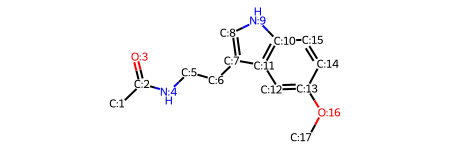

CGRtools


RDKit


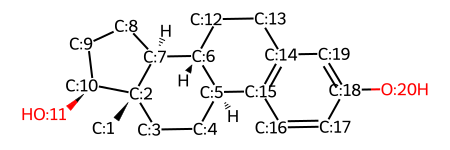

CGRtools


RDKit


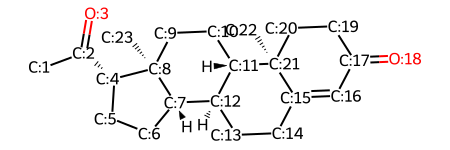

CGRtools


RDKit


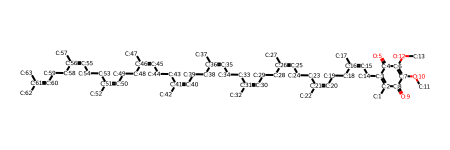

CGRtools


RDKit


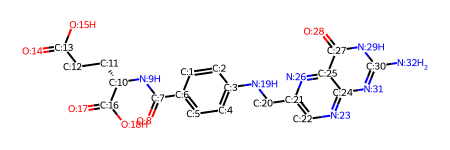

CGRtools


RDKit


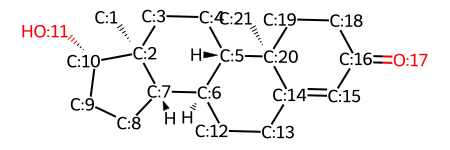

In [23]:
objects_mols = SMILESRead('data/molecules.txt').read() # CGRtools
for mol in objects_mols:
    mol.clean2d()
    print("CGRtools")
    display(mol)
    mol = to_rdkit_molecule(mol) # конвертирование в RDKit
    AllChem.Compute2DCoords(mol) # выполним вычисление 2d в RDkit
    print("RDKit")
    display(mol)
    m = from_rdkit_molecule(mol) # обратно в CGRtools